e:\Rouhin Projects\Nityoday. Geetha. I RP\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Rouhin\AppData\Local\Temp\ipykernel_20056\454965115.py:32: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series)
C:\Users\Rouhin\AppData\Local\Temp\ipykernel_20056\454965115.py:32: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series)


ADF Test for fii_log_diff
ADF Statistic: -1.2181094807700323
p-value: 0.6657573614849948
Critical values:
	1%: -3.5319549603840894
	5%: -2.905755128523123
	10%: -2.5903569458676765


KPSS Test for fii_log_diff
KPSS Statistic: 0.16831141007946523
p-value: 0.1
Critical values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


ADF Test for yield_log_diff
ADF Statistic: -6.810894348550857
p-value: 2.117693769334484e-09
Critical values:
	1%: -3.5219803175527606
	5%: -2.9014701097664504
	10%: -2.58807215485756


KPSS Test for yield_log_diff
KPSS Statistic: 0.11634560453327668
p-value: 0.1
Critical values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739




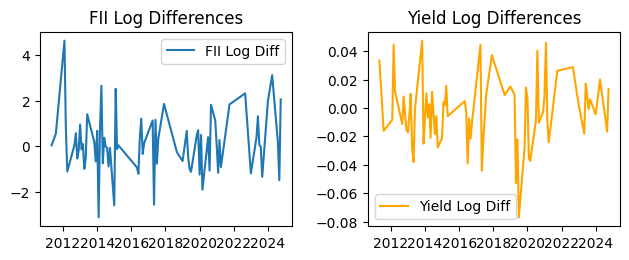

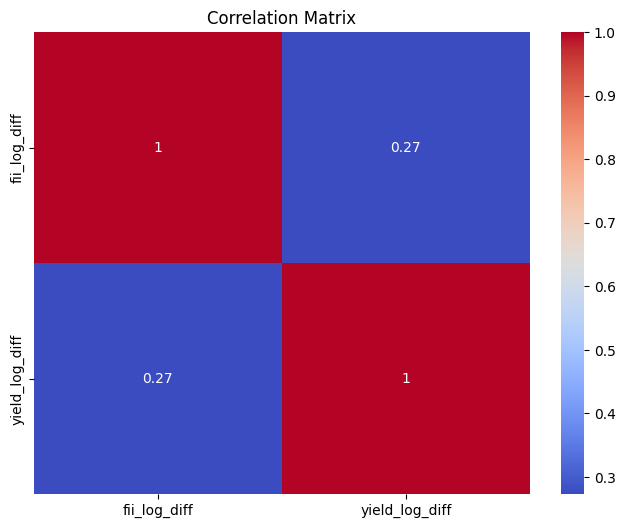

ADF Test for Second Log Difference of FII
ADF Statistic: -7.395662803539925
p-value: 7.790523087278152e-11
Critical values:
	1%: -3.5319549603840894
	5%: -2.905755128523123
	10%: -2.5903569458676765




In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, kpss

# Read the data
df = pd.read_excel("new_india-fii-yeild.xlsx")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Calculate log differences
df['fii_log_diff'] = np.log(df['fii']).diff()
df['yield_log_diff'] = np.log(df['yield']).diff()
df = df.dropna()

# Function for ADF test
def adf_test(series, title=''):
    print(f'ADF Test for {title}')
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    print('\n')

# Function for KPSS test
def kpss_test(series, title=''):
    print(f'KPSS Test for {title}')
    result = kpss(series)
    print('KPSS Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical values:')
    for key, value in result[3].items():
        print(f'\t{key}: {value}')
    print('\n')

# Perform stationarity tests
for column in ['fii_log_diff', 'yield_log_diff']:
    adf_test(df[column], column)
    kpss_test(df[column], column)

# Plot log differences
plt.subplot(2, 2, 3)
plt.plot(df.index, df['fii_log_diff'], label='FII Log Diff')
plt.title('FII Log Differences')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df.index, df['yield_log_diff'], label='Yield Log Diff', color='orange')
plt.title('Yield Log Differences')
plt.legend()

plt.tight_layout()
plt.show()

# Correlation analysis
correlation = df[['fii_log_diff', 'yield_log_diff']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Calculate second log difference for 'fii_log_diff'
df['fii_log_diff2'] = df['fii_log_diff'].diff().dropna()

# Perform ADF test on second log difference of 'fii_log_diff'
adf_test(df['fii_log_diff2'].dropna(), "Second Log Difference of FII")